In [371]:
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# TASK 1:PREDICTING THE AVERAGE PRICE OF AVOCADO

In [372]:
df1=pd.read_csv(r'D:\samaira\flipRoboAssgn\avocado.csv')

In [373]:
df1

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [374]:
#As Unnamed column contains unique nos ,so dropping this column
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [375]:
df1.shape

(18249, 13)

CHECKING FOR NULL VALUES IN DATASET

In [376]:
df1.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

As observed above no null values are present in the dataset

CHECKING FOR DUPLICACY OF RECORDS

In [377]:
df1.duplicated().sum()

0

As observed from above,there are no duplicate data in the rows

In [378]:
df1.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [379]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


As observed from above info,there are total 18249 records of 13 features
3 features have object datatype,1 feature holds the integer data,while other columns holds float datatype

In [380]:
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [381]:
df1.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [382]:
#Lets see the datatpe of Date
df1.Date.dtypes

dtype('O')

As the daataype of "date" is object ,lets convert that to datetype

In [383]:
df1['Date']=pd.to_datetime(df1['Date'])
df1['Day']=df1['Date'].dt.day
df1['year']=df1['Date'].dt.year
df1['Month']=df1['Date'].dt.month

In [384]:
#As original date column doesnt hold much value as it been converted to seperate day,month ,year column
df1.drop('Date',axis=1,inplace=True)

In [385]:
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1


SEPERATING CATEGORICAL AND NUMERIC COLUMNS

In [386]:
cat=[]             ##variable holding categoricl list
num=[]             ##variable holding the numerical list
for i in df1:
    if df1[i].dtypes=='object':
        cat.append(i)
    else:
        num.append(i)

In [387]:
print('categorical column',cat)
print('numeric column',num)

categorical column ['type', 'region']
numeric column ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Day', 'Month']


In [388]:
df1.type.unique()

array(['conventional', 'organic'], dtype=object)

In [389]:
df1.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

As our target variable is Average price,lets observe unique values of price

In [390]:
df1.AveragePrice.unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [391]:
df1.AveragePrice.nunique()

259

As there are more unique values present in the dataset which are continous.
It is considered as the Regresson problem

In [392]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


All of features have mean>median,i.e Data is skewed more towards right
Also there is huge difference between 75th percentile and maximum value,so outliers are presnt in dataset

EDA-UNIVARIATE ANALYSIS

<Axes: xlabel='AveragePrice', ylabel='Density'>

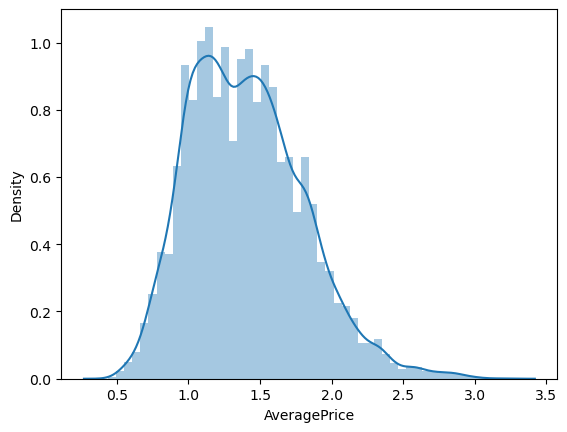

In [393]:
sns.distplot(df1['AveragePrice'],kde=True)

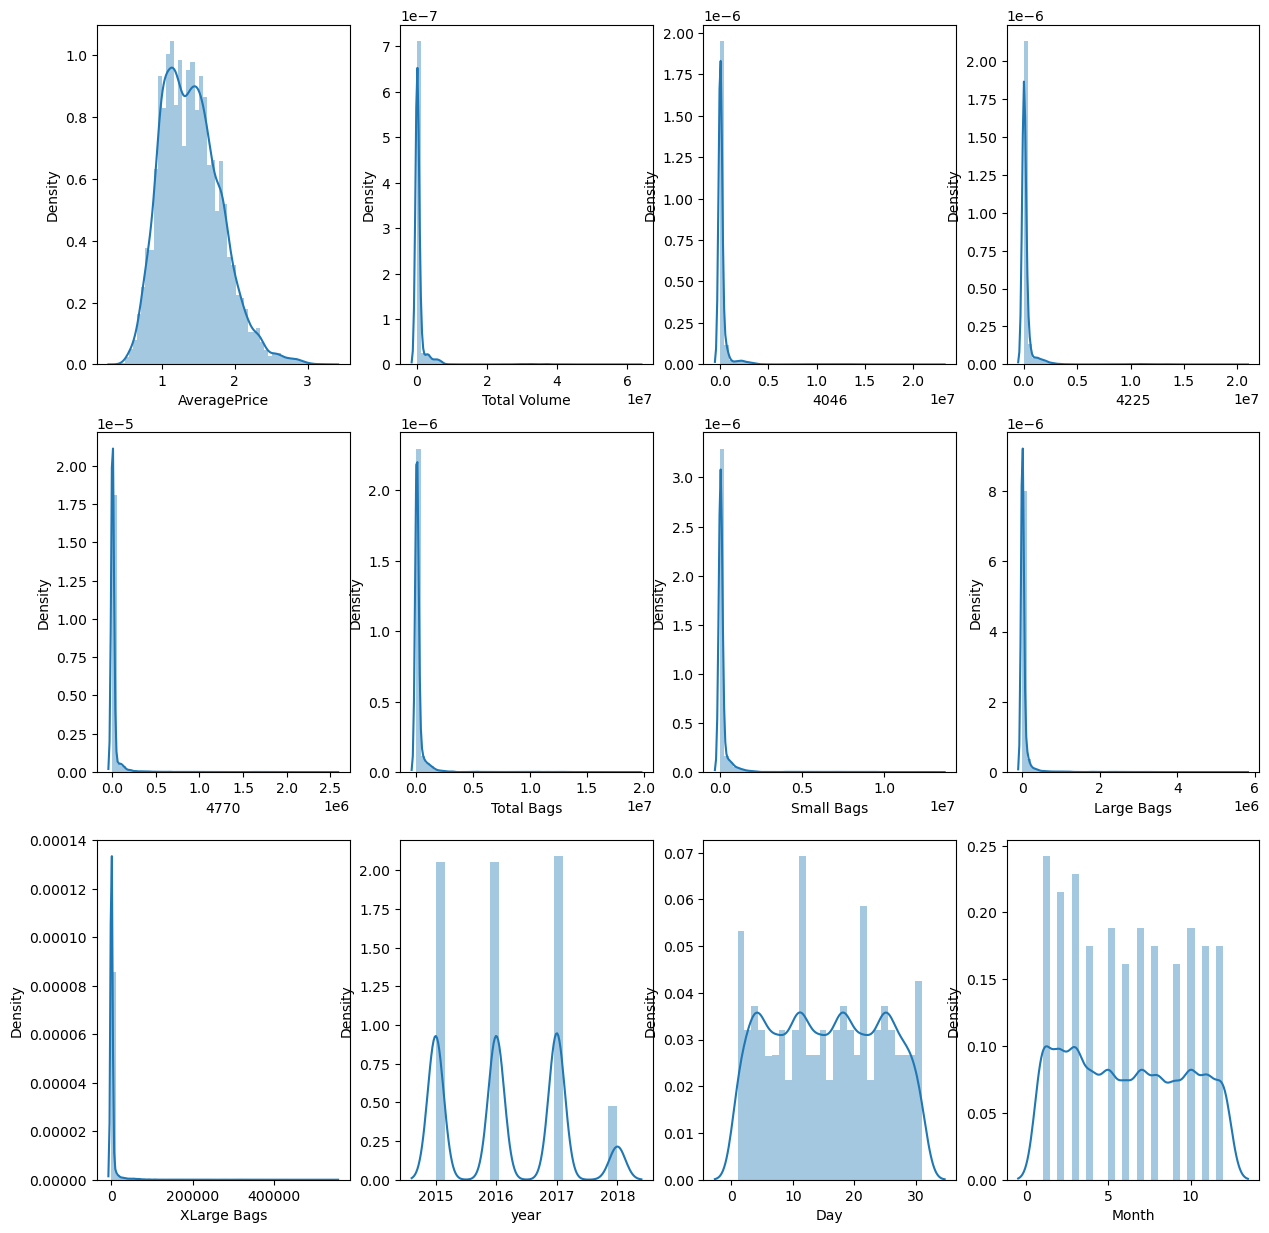

In [394]:
#Lets see distributon of data
plt.figure(figsize=(15,15))
p=1
for i in num:
    if p<=12:
        plt.subplot(3,4,p)
        sns.distplot(df1[i],kde=True)
    p+=1
plt.show()

From above graphs we observe that,average price of Avocado ranges between 1.1 to 1.5
All other features are right skewed
As year ,day, and month are equally distributed,they have 3-4 peaks

conventional    9126
organic         9123
Name: type, dtype: int64


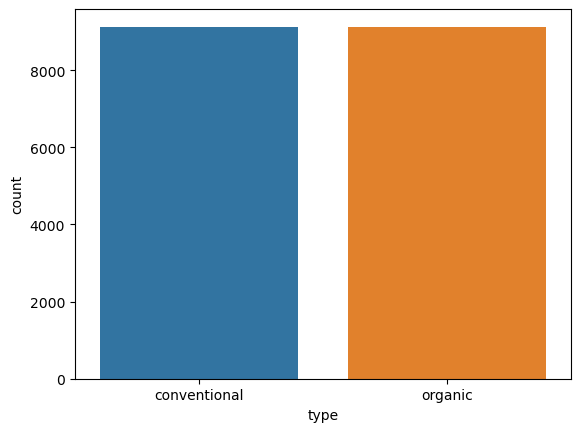

In [395]:
sns.countplot(data=df1,x='type')
print(df1.type.value_counts())

We observe that there are equal variety of conventional and organic type of Avocados

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

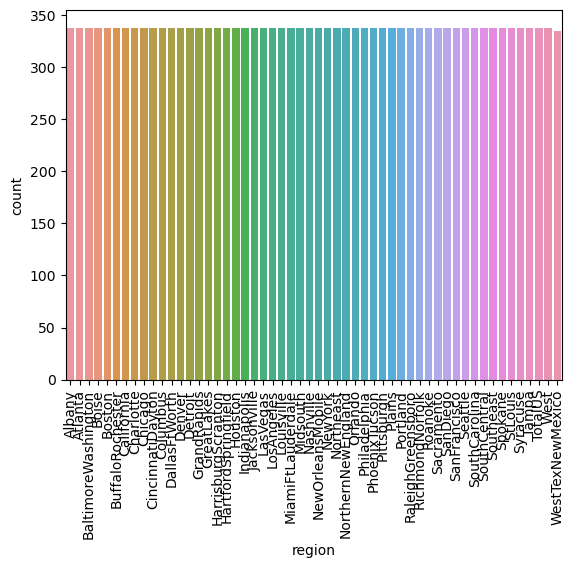

In [396]:
sns.countplot(data=df1,x='region')
plt.xticks(rotation=90)
print(df1.region.value_counts())

From above graph we observe that every region is equally distributed

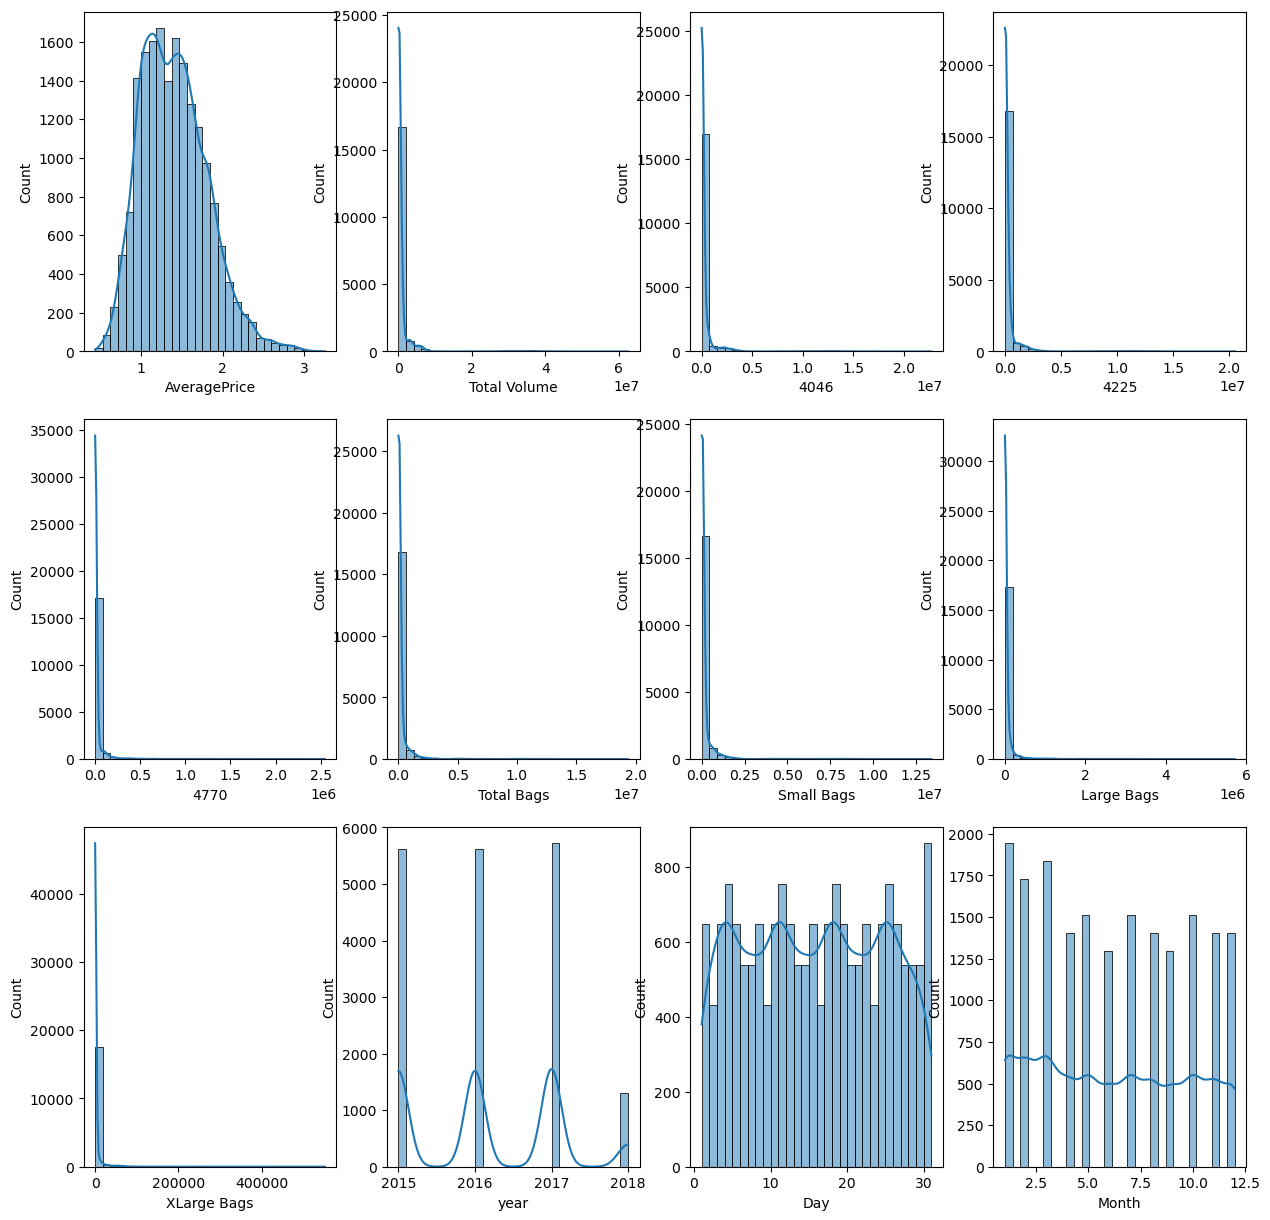

In [397]:
#Lets see histogram of data
plt.figure(figsize=(15,15))
p=1
for i in num:
    if p<=12:
        plt.subplot(3,4,p)
        sns.histplot(df1[i],kde=True,bins=30)
    p+=1
plt.show()

From above histogram plot,it is evitable that every feature has asymmetric data present on the left ie right skewness is there on dataset

BIVARIATE ANALYSIS

In [398]:
num

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year',
 'Day',
 'Month']

<Axes: xlabel='Total Bags', ylabel='year'>

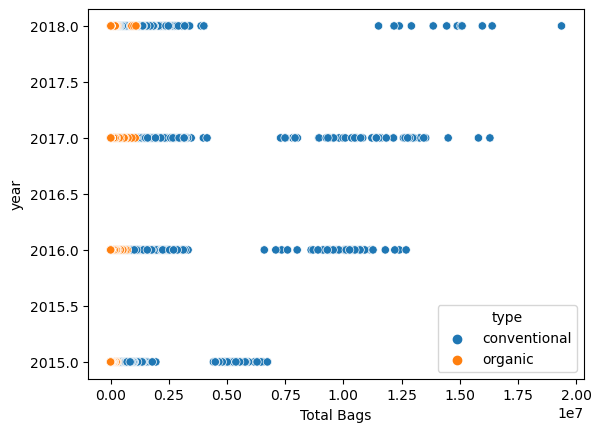

In [399]:
sns.scatterplot(x='Total Bags',y='year',hue='type',data=df1)

From above plot we observe that there are more demand of conventional datatype as compared to organic in the coming years

<Axes: xlabel='Month', ylabel='AveragePrice'>

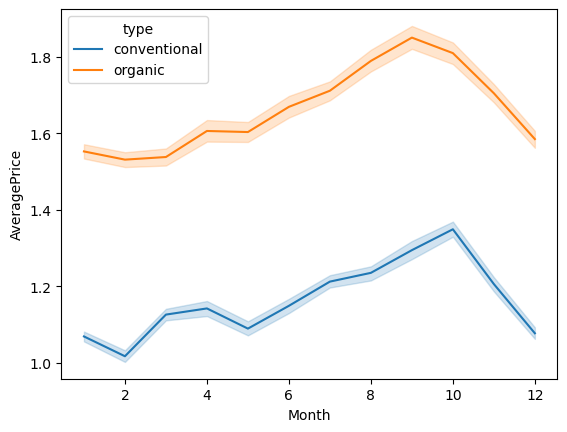

In [400]:
sns.lineplot(x='Month',y='AveragePrice',hue='type',data=df1)

The price of conventional avocados is less over the months
while the price of organic avocados is more

<Axes: xlabel='Small Bags', ylabel='Total Volume'>

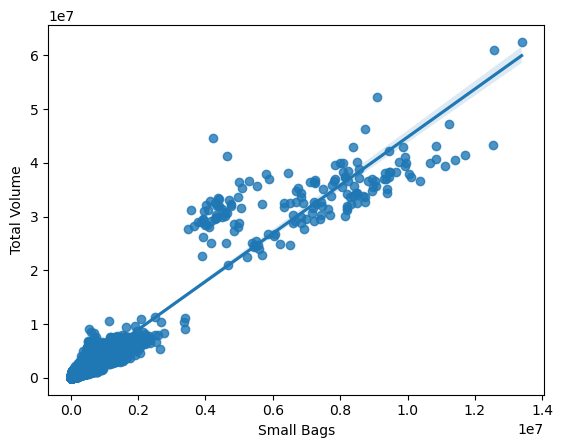

In [401]:
sns.regplot(x='Small Bags',y='Total Volume',data=df1)

From above we observe that Small bags and total volume are highly poitively collinear to each ther

<Axes: xlabel='Large Bags', ylabel='Total Volume'>

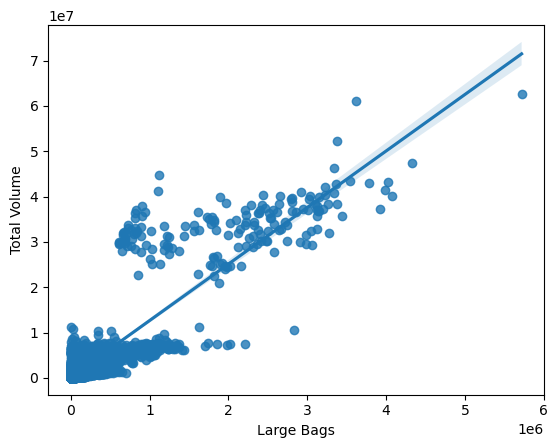

In [402]:
sns.regplot(x='Large Bags',y='Total Volume',data=df1)

From above graph we observe that large bag are less collinear as compared to small bags with volume as data ponts are not located on reg line completely

<Axes: xlabel='XLarge Bags', ylabel='Total Volume'>

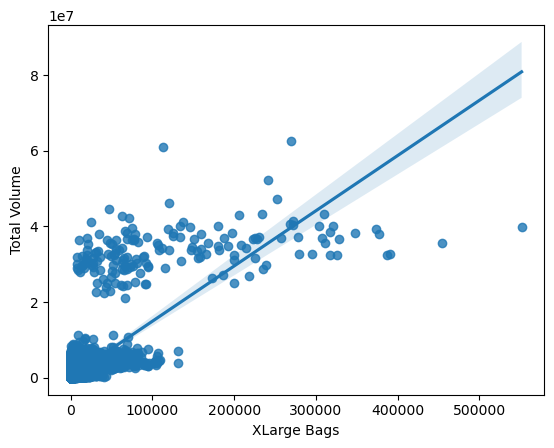

In [403]:
sns.regplot(x='XLarge Bags',y='Total Volume',data=df1)

From above graph its evitable that xlarge bags are very less collinear with total volume as more data points are scatterd away from reg line

<Axes: xlabel='Small Bags', ylabel='Total Bags'>

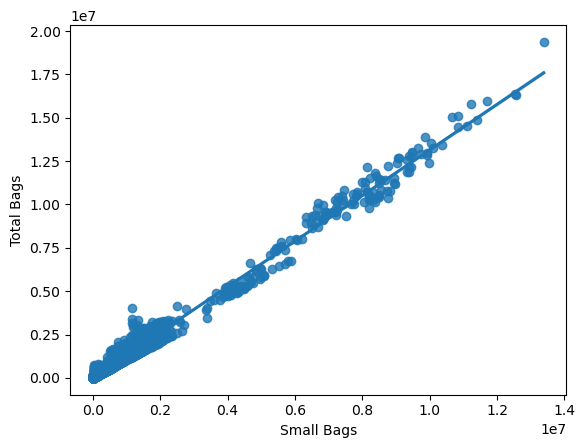

In [404]:
sns.regplot(x='Small Bags',y='Total Bags',data=df1)

from above graph,its observe that small bags are highly collinear to total bags

<Axes: xlabel='Large Bags', ylabel='Total Bags'>

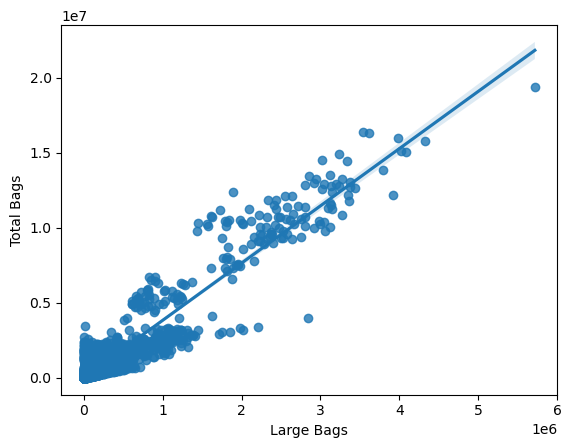

In [405]:
sns.regplot(x='Large Bags',y='Total Bags',data=df1)

From above garph we notice that large bags are less collinear to total bags 

<Axes: xlabel='XLarge Bags', ylabel='Total Bags'>

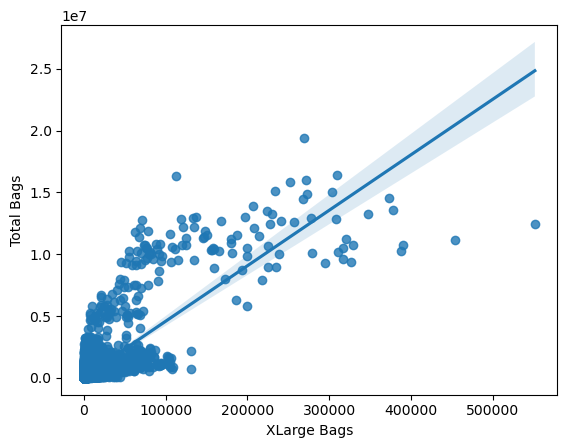

In [406]:
sns.regplot(x='XLarge Bags',y='Total Bags',data=df1)

From above graph its observed that xLarge bags are ver very less collinear to total bags

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'HartfordSpringfield'),
  Text(1, 0, 'SanFrancisco'),
  Text(2, 0, 'NewYork'),
  Text(3, 0, 'Philadelphia'),
  Text(4, 0, 'Sacramento'),
  Text(5, 0, 'Charlotte'),
  Text(6, 0, 'Northeast'),
  Text(7, 0, 'Albany'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'RaleighGreensboro'),
  Text(10, 0, 'BaltimoreWashington'),
  Text(11, 0, 'Boston'),
  Text(12, 0, 'Syracuse'),
  Text(13, 0, 'BuffaloRochester'),
  Text(14, 0, 'HarrisburgScranton'),
  Text(15, 0, 'Jacksonville'),
  Text(16, 0, 'Orlando'),
  Text(17, 0, 'GrandRapids'),
  Text(18, 0, 'NorthernNewEngland'),
  Text(19, 0, 'Spokane'),
  Text(20, 0, 'Seattle'),
  Text(21, 0, 'Plains'),
  Text(22, 0, 'StLouis'),
  Text(23, 0, 'MiamiFtLauderdale'),
  Text(24, 0, 'Tampa'),
  Text(25, 0,

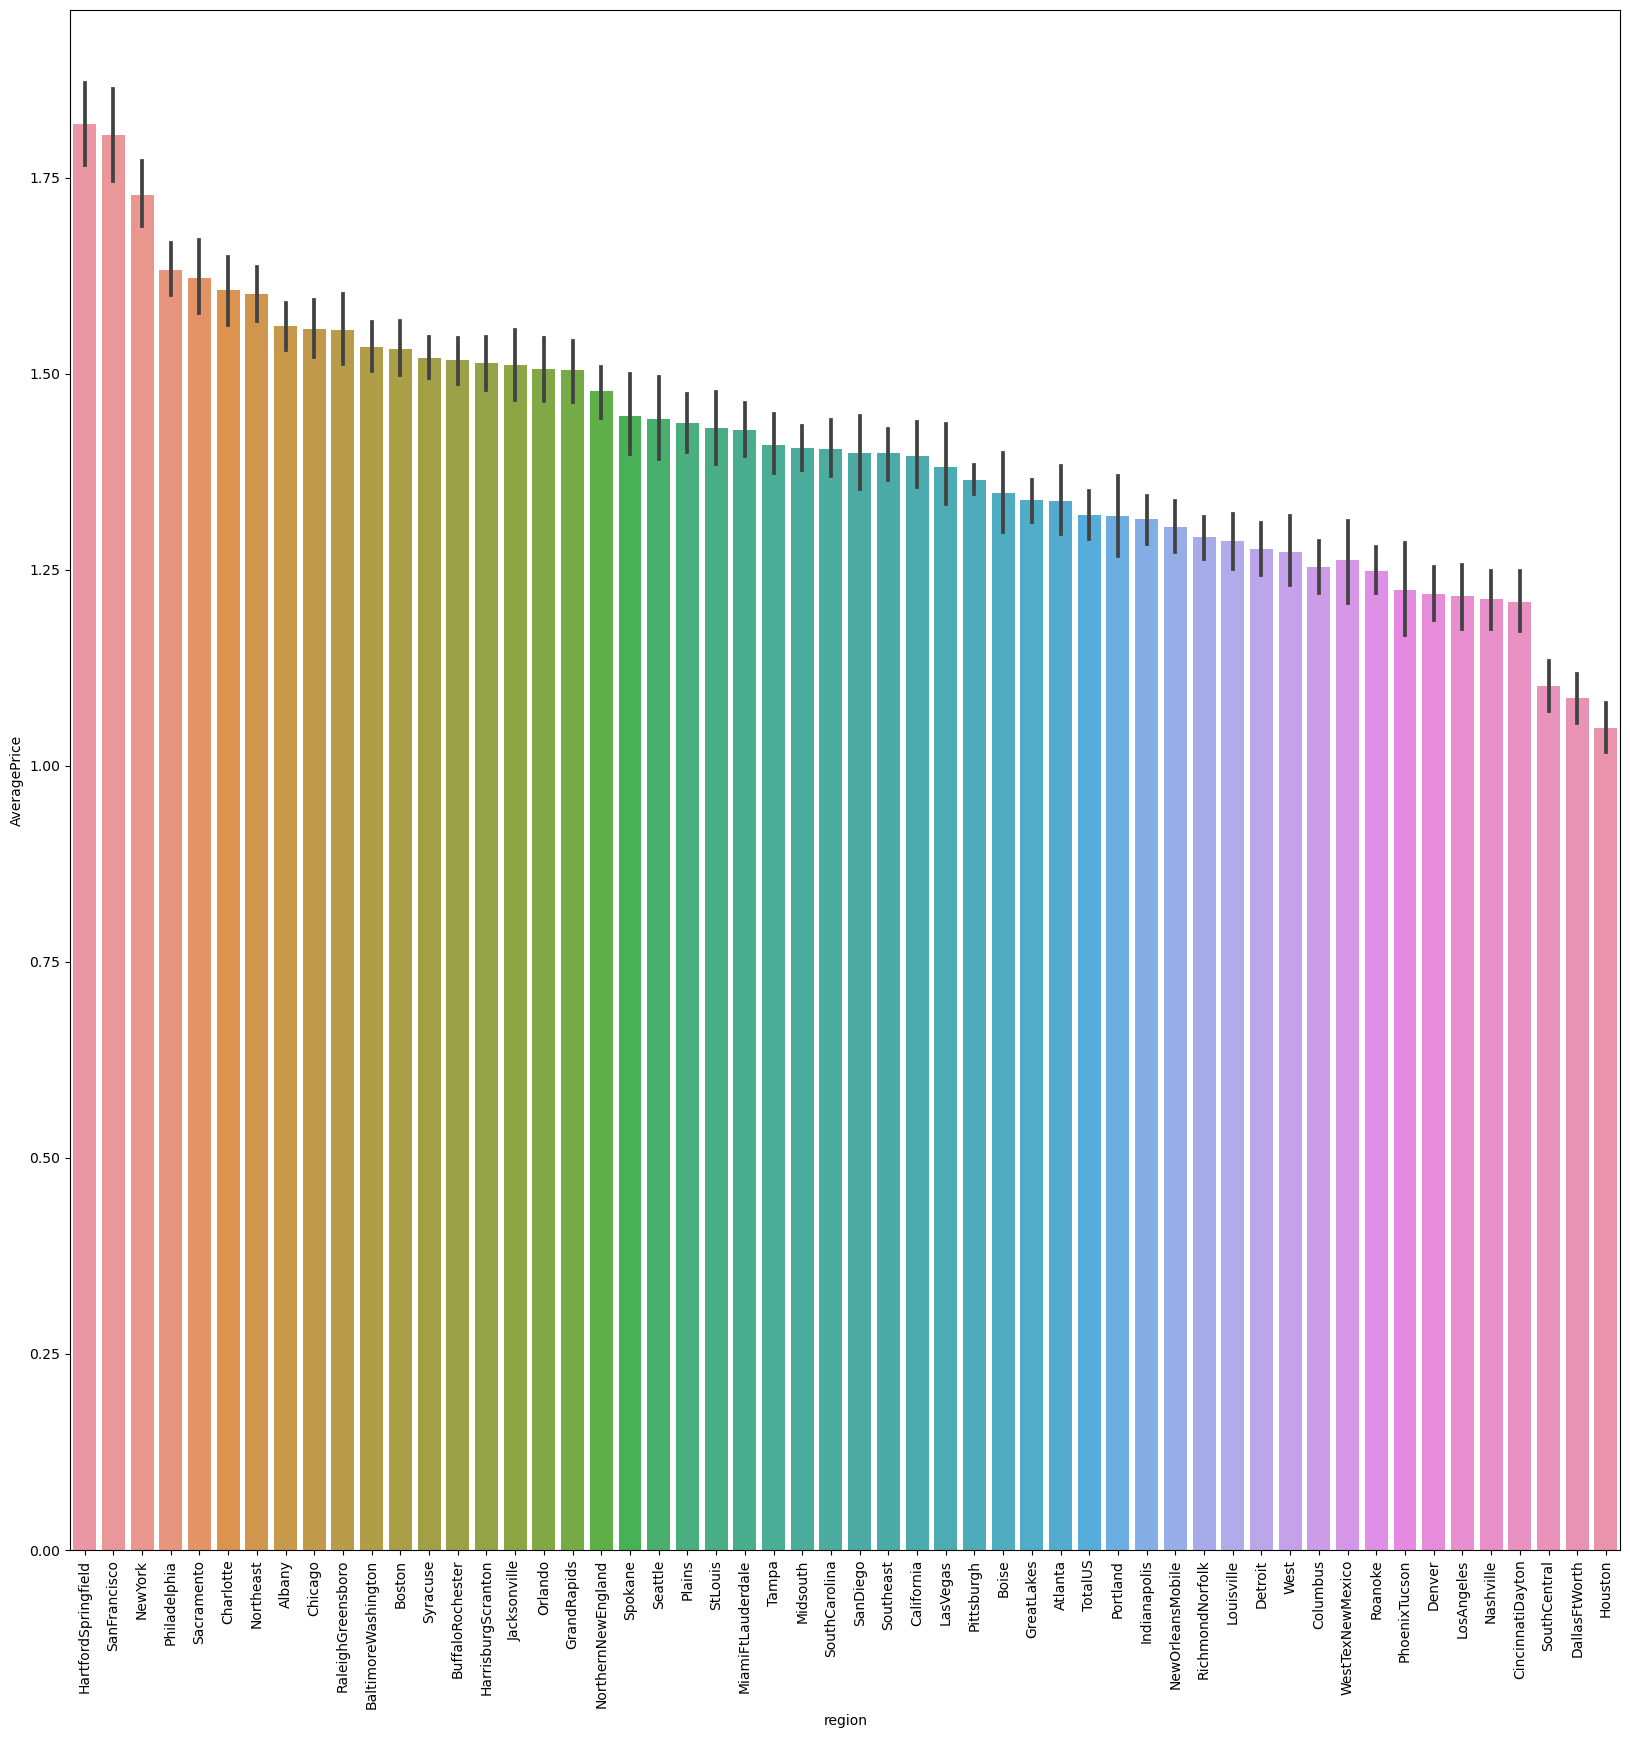

In [407]:
plt.figure(figsize=(20,20))
plotorder=df1.groupby('region')['AveragePrice'].sum().sort_values(ascending=False).index.values
sns.barplot(x='region',y='AveragePrice',data=df1,order=plotorder)
plt.xticks(rotation=90)

From above garph we notice that in these 5 regions avocado prices are very high

1 HartfordSpringfield
2 SanFrancisco
3 NewYork
4 Philadelphia
5 Sacramento

<Axes: xlabel='Month', ylabel='AveragePrice'>

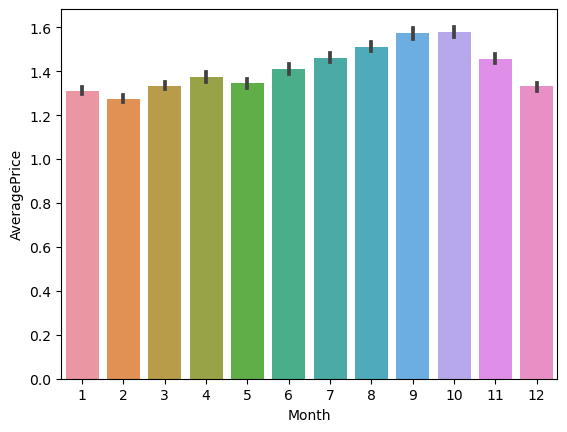

In [408]:

sns.barplot(x='Month',y='AveragePrice',data=df1)

Froma bove graph we notice that in 9th,10th nd 11th month the Average prices of Avocado are more

<Axes: xlabel='year', ylabel='Total Volume'>

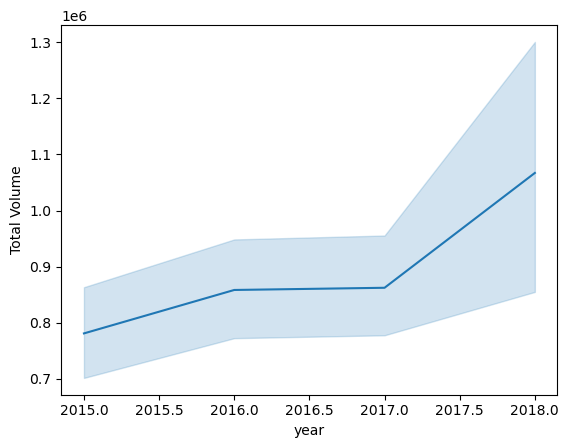

In [409]:
sns.lineplot(x='year',y='Total Volume',data=df1)

We observe that increasing graph over the years,this means that consumption incraese in avocado as the year proceed

<Axes: xlabel='type', ylabel='AveragePrice'>

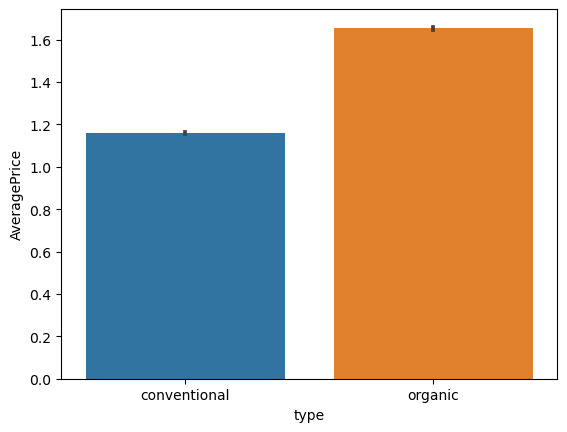

In [410]:
sns.barplot(x='type',y='AveragePrice',data=df1)

We notice that average price of avocado for convetional type is less as compared to oraganic type

<Axes: xlabel='type', ylabel='Total Bags'>

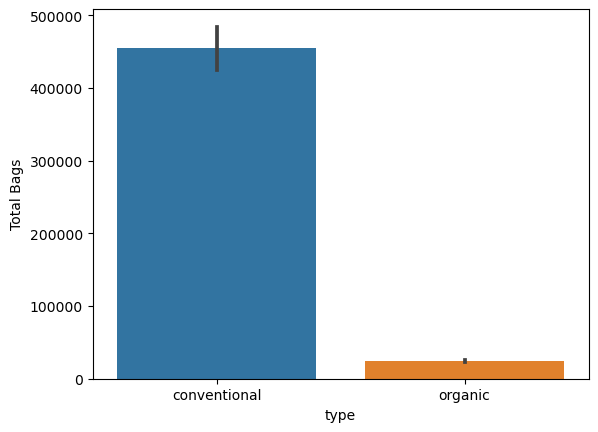

In [411]:
sns.barplot(x='type',y='Total Bags',data=df1)

We observe that total bags sold of conventional type is far more as compared to organic type

<Axes: xlabel='type', ylabel='Total Volume'>

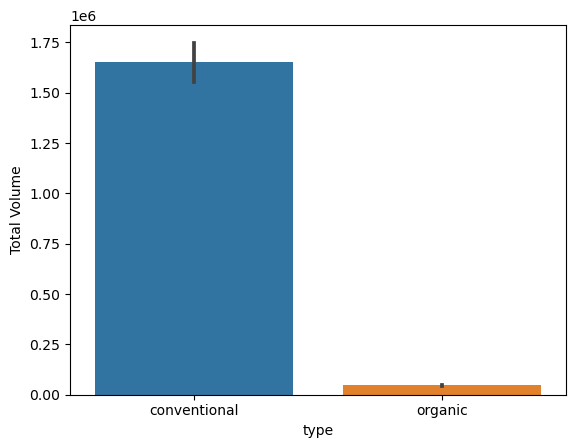

In [412]:
sns.barplot(x='type',y='Total Volume',data=df1)

We also notice that more consumption of conventional type as compared to organic type,because the prices of organic type are more

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'TotalUS'),
  Text(1, 0, 'West'),
  Text(2, 0, 'California'),
  Text(3, 0, 'SouthCentral'),
  Text(4, 0, 'Northeast'),
  Text(5, 0, 'Southeast'),
  Text(6, 0, 'GreatLakes'),
  Text(7, 0, 'Midsouth'),
  Text(8, 0, 'LosAngeles'),
  Text(9, 0, 'Plains'),
  Text(10, 0, 'NewYork'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Houston'),
  Text(13, 0, 'PhoenixTucson'),
  Text(14, 0, 'WestTexNewMexico'),
  Text(15, 0, 'Denver'),
  Text(16, 0, 'SanFrancisco'),
  Text(17, 0, 'BaltimoreWashington'),
  Text(18, 0, 'Chicago'),
  Text(19, 0, 'Portland'),
  Text(20, 0, 'Seattle'),
  Text(21, 0, 'MiamiFtLauderdale'),
  Text(22, 0, 'Boston'),
  Text(23, 0, 'SanDiego'),
  Text(24, 0, 'Atlanta'),
  Text(25, 0, 'Sacramento'),
  Text(26, 0, 'Phi

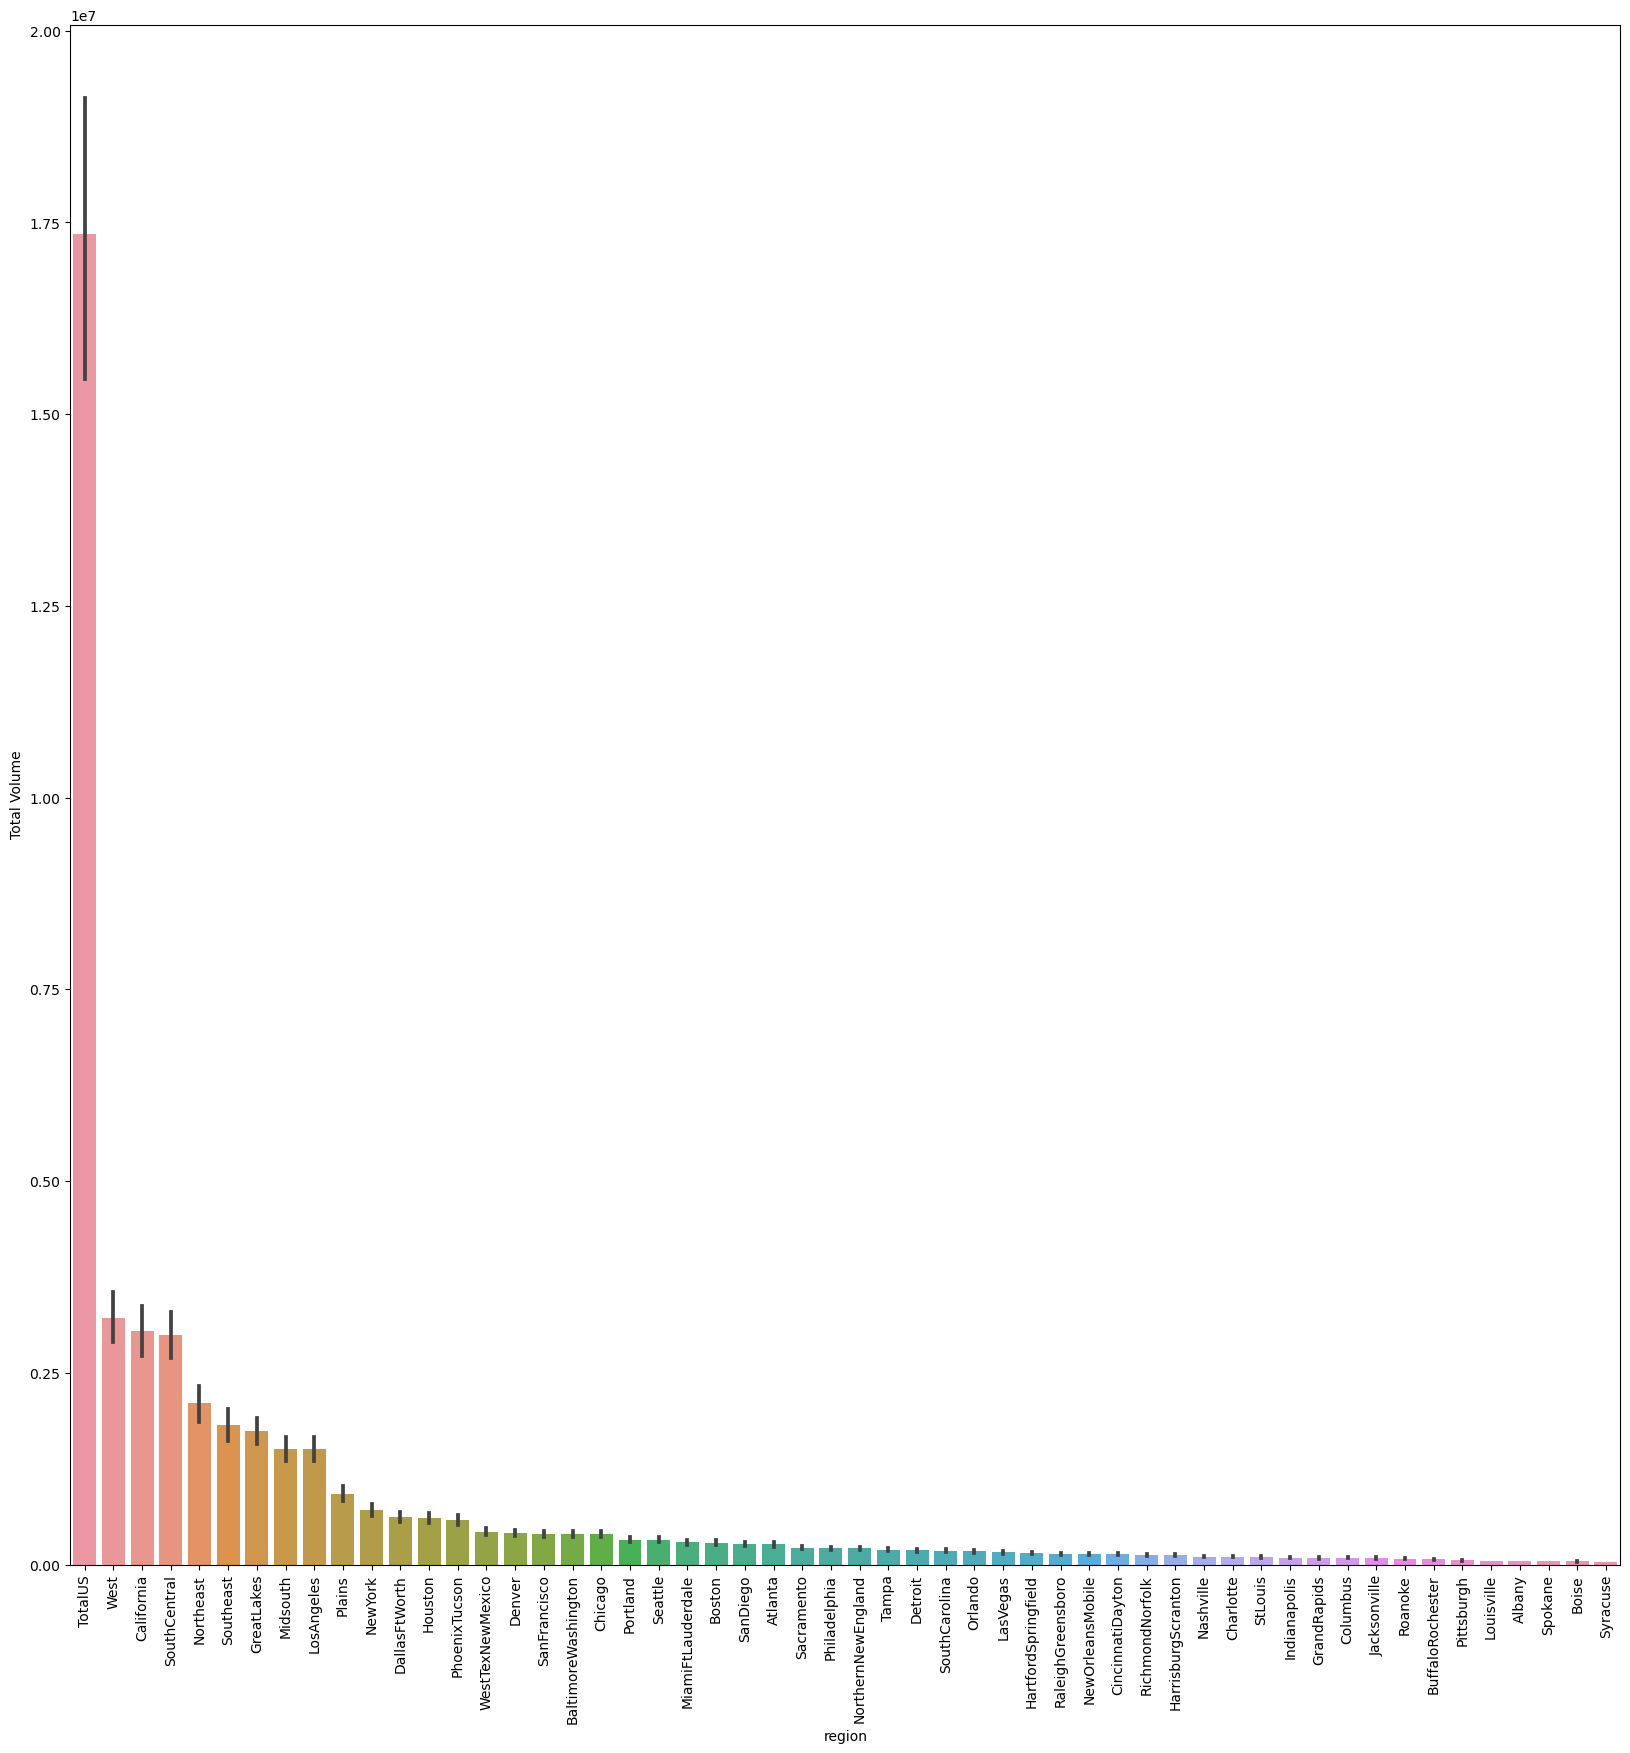

In [413]:
plt.figure(figsize=(20,20))
plotorder=df1.groupby('region')['Total Volume'].sum().sort_values(ascending=False).index.values
sns.barplot(x='region',y='Total Volume',data=df1,order=plotorder)
plt.xticks(rotation=90)

We observe that highest consumption ie largest amount of avocados are sold in the US region as compared to other regions following West,California,South Central

<Axes: xlabel='year', ylabel='AveragePrice'>

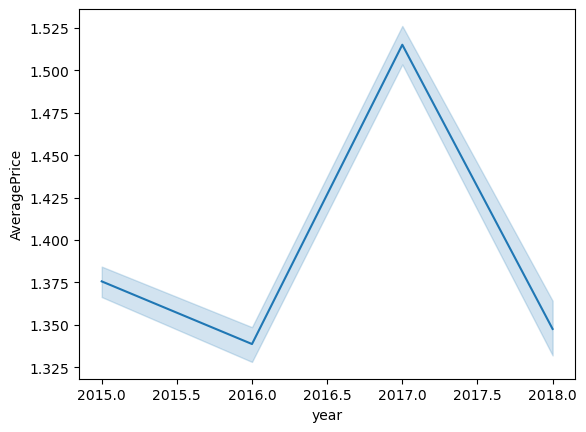

In [414]:
sns.lineplot(x='year',y='AveragePrice',data=df1)

We observe thatAveragePrice is highest in the year 2017 to mid of 2017
We also notice that avocado prices have increased from the year 2016 to 1017,while little fall in prices is observe in the year 2018

CHECKING OUTLIERS 

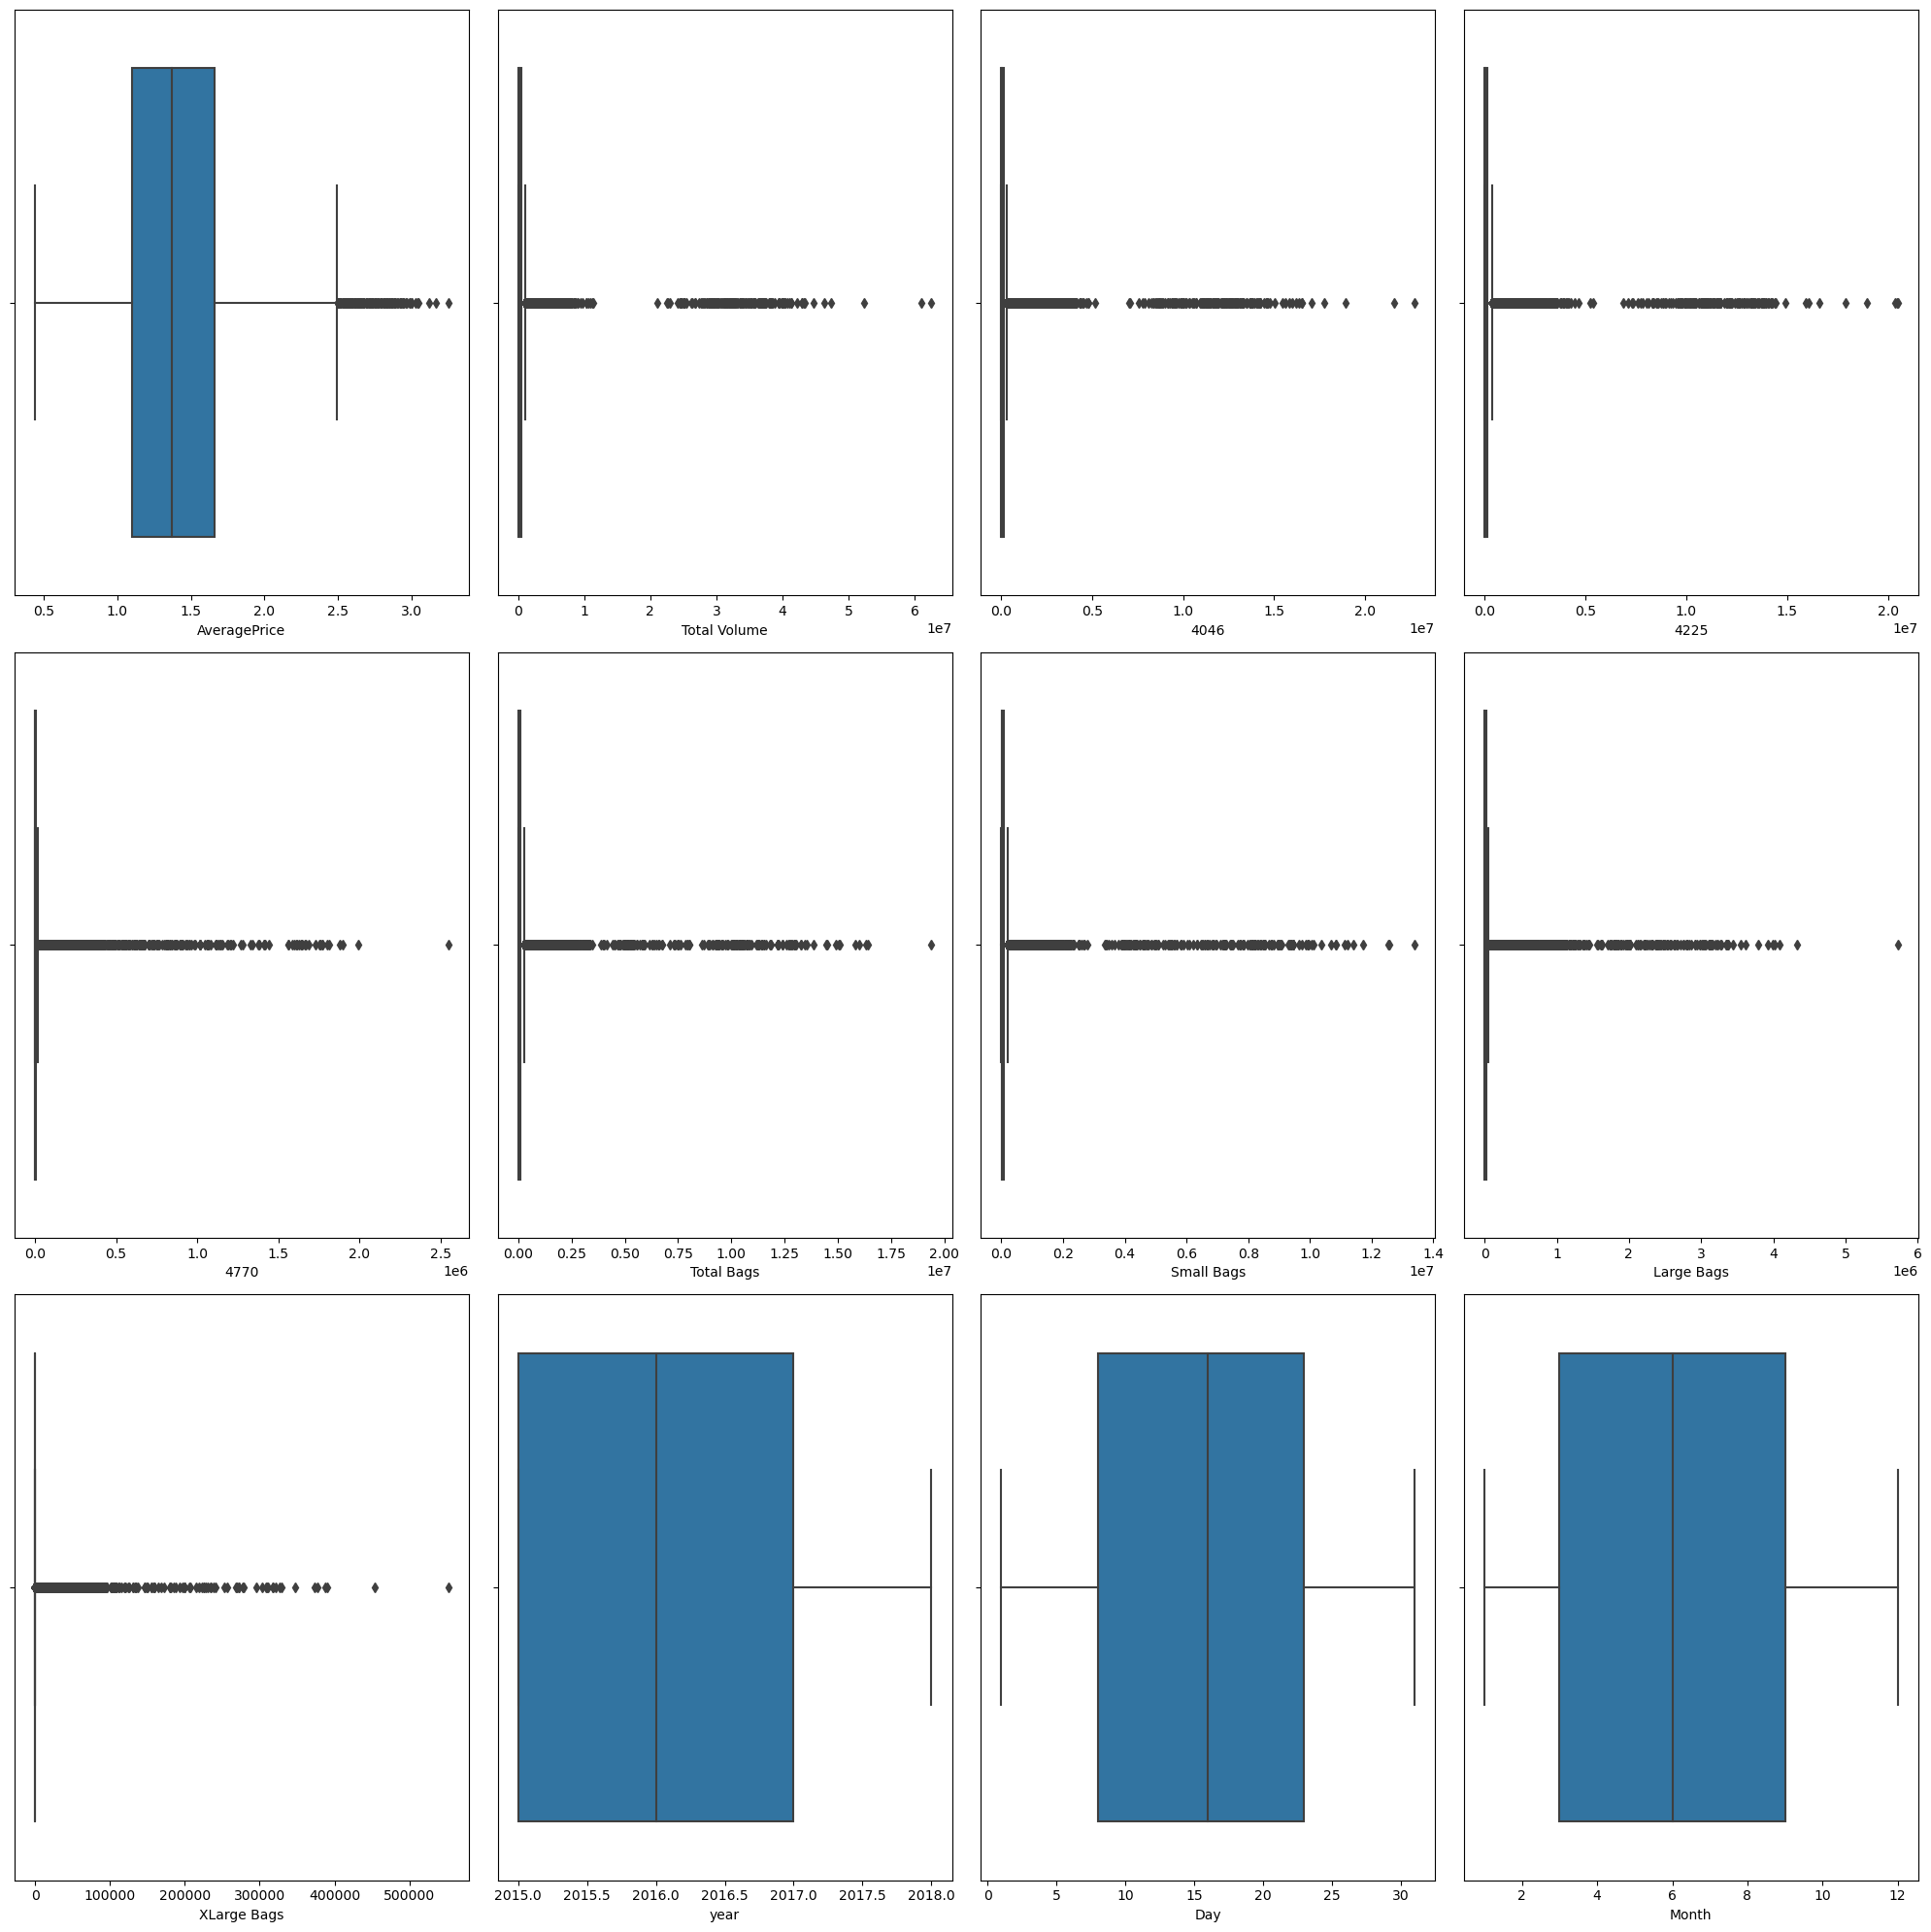

In [415]:
plt.figure(figsize=(20,20))
p=1
for n in num:
    if p<=12:
        plt.subplot(3,4,p)
    
        sns.boxplot(x=n,data=df1)
    p+=1
plt.tight_layout()
    
    

In [416]:
from scipy.stats import zscore
out=df1[['Total Bags','Total Volume','4046','4225','4770']]
z=np.abs(zscore(out))
z

,Total Bags,Total Volume,4046,4225,4770
0,0.234170,0.227716,0.230816,0.199902,0.212091
1,0.233350,0.230427,0.231103,0.208054,0.211997
2,0.234730,0.212085,0.231007,0.154478,0.211325
3,0.237096,0.223444,0.230741,0.185350,0.211864
4,0.236718,0.231538,0.230891,0.208719,0.211834
...,...,...,...,...,...
18244,0.229301,0.241373,0.230017,0.243857,0.212540
18245,0.233594,0.242296,0.230693,0.242277,0.212540
18246,0.233463,0.242331,0.230693,0.243090,0.205766
18247,0.231866,0.241625,0.230428,0.242651,0.205774


In [417]:
np.where(z>3)

(array([ 346,  359,  783,  787,  788,  790,  791,  792,  794,  795,  796,
         797,  799,  803,  805,  807,  808,  809,  812,  816,  820,  823,
         827, 1334, 1347, 1516, 1518, 1541, 2340, 2341, 2348, 2351, 2368,
        2370, 2652, 2652, 2652, 2652, 2652, 2653, 2653, 2653, 2653, 2653,
        2654, 2654, 2654, 2654, 2654, 2655, 2655, 2655, 2655, 2655, 2656,
        2656, 2656, 2656, 2656, 2657, 2657, 2657, 2657, 2657, 2658, 2658,
        2658, 2658, 2658, 2659, 2659, 2659, 2659, 2659, 2660, 2660, 2660,
        2660, 2660, 2661, 2661, 2661, 2661, 2661, 2662, 2662, 2662, 2662,
        2662, 2663, 2663, 2663, 2663, 2663, 2664, 2664, 2664, 2664, 2664,
        2665, 2665, 2665, 2665, 2665, 2666, 2666, 2666, 2666, 2666, 2667,
        2667, 2667, 2667, 2667, 2668, 2668, 2668, 2668, 2668, 2669, 2669,
        2669, 2669, 2669, 2670, 2670, 2670, 2670, 2670, 2671, 2671, 2671,
        2671, 2671, 2672, 2672, 2672, 2672, 2672, 2673, 2673, 2673, 2673,
        2673, 2674, 2674, 2674, 2674, 

In [418]:
df1.shape

(18249, 14)

In [419]:
#Removing ouliers where zscore is greater than 3(ie more than 3 standard deviation)
df_new=df1[(z<3).all(axis=1)]
df_new.shape

(17954, 14)

from above we observe that almost 1000 rows of 18249 are dropped showing outliers

Hence outliers are detected and been handled

In [420]:
df1=df_new

In [421]:
df1.shape

(17954, 14)

CHECKING SKEWNESS IN THE FAETURES

In [422]:
df1.skew()

AveragePrice    0.567462
Total Volume    3.652874
4046            4.468176
4225            4.144362
4770            4.811458
Total Bags      4.346371
Small Bags      4.169211
Large Bags      7.238581
XLarge Bags     6.909130
year            0.212932
Day             0.011819
Month           0.101940
dtype: float64

From above we observe that skewness is present in dataset
Lets handle it

In [423]:
df1['Total Bags']=np.cbrt(df1['Total Bags'])

In [424]:
df1.skew()

AveragePrice    0.567462
Total Volume    3.652874
4046            4.468176
4225            4.144362
4770            4.811458
Total Bags      1.355270
Small Bags      4.169211
Large Bags      7.238581
XLarge Bags     6.909130
year            0.212932
Day             0.011819
Month           0.101940
dtype: float64

In [425]:
df1['Total Volume']=np.log(df1['Total Volume'])

In [426]:
df1['Small Bags']=np.cbrt(df1['Small Bags'])

In [427]:
df1['Large Bags']=np.cbrt(df1['Large Bags'])

In [428]:
df1['XLarge Bags']=np.cbrt(df1['XLarge Bags'])

In [429]:
df1['4046']=np.cbrt(df1['4046'])

In [430]:
df1['4225']=np.cbrt(df1['4225'])

In [431]:
df1['4770']=np.cbrt(df1['4770'])

In [432]:
df1.skew()

AveragePrice    0.567462
Total Volume   -0.020955
4046            1.570014
4225            1.278229
4770            1.625593
Total Bags      1.355270
Small Bags      1.320029
Large Bags      1.521728
XLarge Bags     2.390416
year            0.212932
Day             0.011819
Month           0.101940
dtype: float64

Hence the skewness is been handled

LETS SEE CORRELTAION BETWEEN FEATURES AND TARGET VARIABLE

In [433]:
cor=df1.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Day,Month
AveragePrice,1.000000,-0.580007,-0.531762,-0.433750,-0.450432,-0.501704,-0.461794,-0.447918,-0.298657,0.093595,0.025126,0.159822
Total Volume,-0.580007,1.000000,0.828850,0.884238,0.741403,0.895217,0.880189,0.692394,0.570007,0.089916,-0.006783,-0.029908
4046,-0.531762,0.828850,1.000000,0.759288,0.719486,0.848493,0.833901,0.690769,0.599402,0.011935,-0.007681,-0.028870
4225,-0.433750,0.884238,0.759288,1.000000,0.790491,0.870975,0.870070,0.642710,0.591361,-0.004278,-0.008662,-0.029826
4770,-0.450432,0.741403,0.719486,0.790491,1.000000,0.739397,0.747839,0.520306,0.637966,-0.070162,-0.001257,-0.034767
Total Bags,-0.501704,0.895217,0.848493,0.870975,0.739397,1.000000,0.975222,0.803455,0.653861,0.181484,-0.002070,-0.023747
Small Bags,-0.461794,0.880189,0.833901,0.870070,0.747839,0.975222,1.000000,0.673956,0.655642,0.163517,0.001088,-0.020313
Large Bags,-0.447918,0.692394,0.690769,0.642710,0.520306,0.803455,0.673956,1.000000,0.453562,0.181705,-0.005997,-0.022180
XLarge Bags,-0.298657,0.570007,0.599402,0.591361,0.637966,0.653861,0.655642,0.453562,1.000000,0.168853,0.010439,0.000398
year,0.093595,0.089916,0.011935,-0.004278,-0.070162,0.181484,0.163517,0.181705,0.168853,1.000000,0.004087,-0.175075


<Axes: >

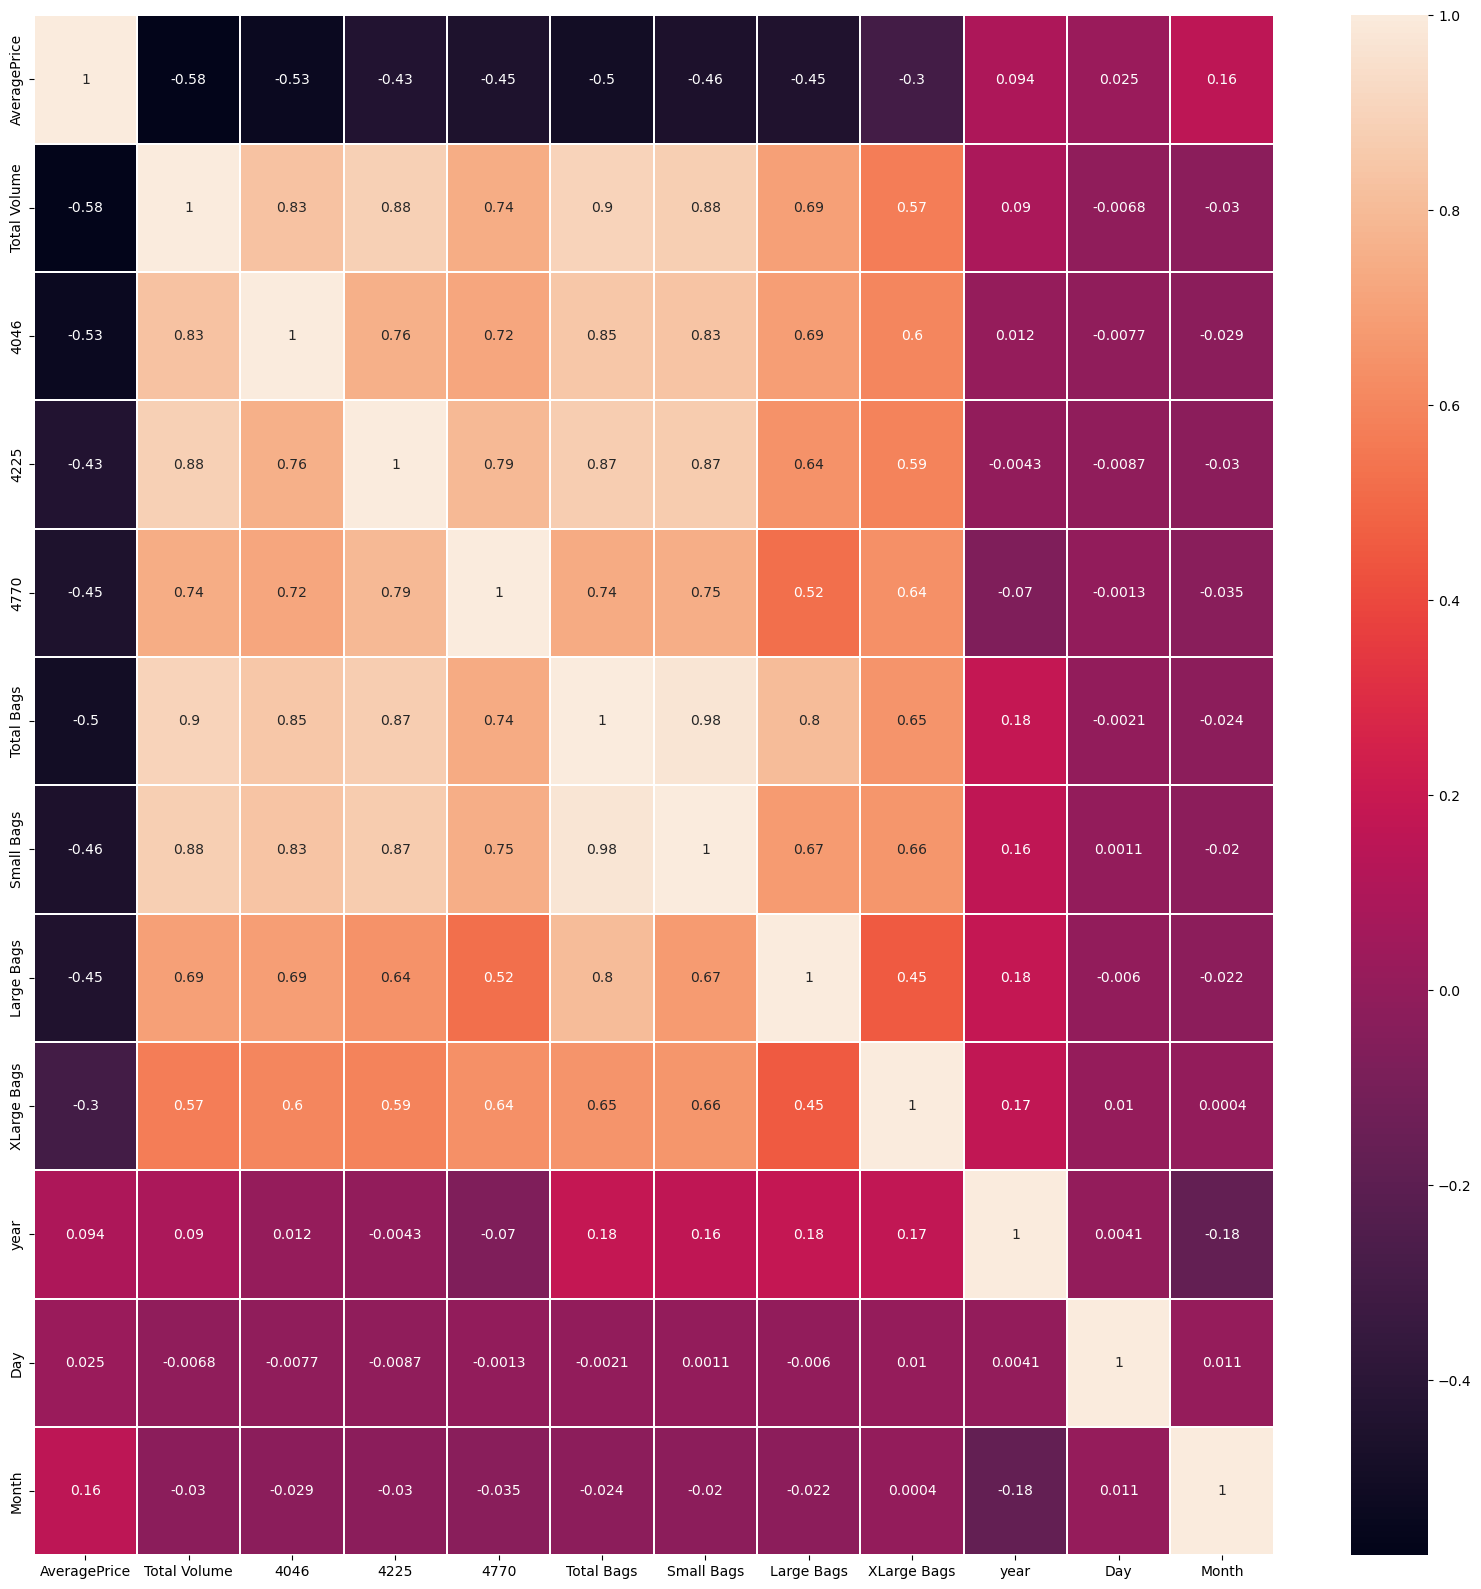

In [434]:
#lets visualize the correlation in heatmap

plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True,linewidths=0.1)

We observe that Total volume 4046 4225 4770 total bags small bags large bags are highly negatively correlated to each other and to the target variable 'Average price'
date column is very less ccorrelated to target variable
we observe multicollinearity between independent variables

    ENCODING CATEGORICAL COLUMNS

In [435]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df1:
    if df1[i].dtypes=='object':
         df1[i]=le.fit_transform(df1[i].values.reshape(-1,1))

df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,11.070329,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,0,2015,0,27,12
1,1.35,10.912849,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,0,2015,0,20,12
2,0.93,11.680304,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,0,2015,0,13,12
3,1.08,11.277104,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,0,2015,0,6,12
4,1.28,10.840357,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,0,2015,0,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745361,12.697058,11.520945,0.000000,23.810234,23.553564,7.558651,0.0,1,2018,53,4,2
18245,1.71,9.538783,10.602029,15.083241,0.000000,21.002902,20.754542,6.873934,0.0,1,2018,53,28,1
18246,1.87,9.530012,10.602681,13.486113,8.995636,21.100134,21.068409,3.484558,0.0,1,2018,53,21,1
18247,1.93,9.693089,11.517001,14.392048,8.991803,22.219254,22.185443,3.684031,0.0,1,2018,53,14,1


SEPERATING TARGET AND INDEPENDENDENT VARIABLES

In [436]:
x=df1.drop('AveragePrice',axis=1)
y=df1['AveragePrice']

In [437]:
x.shape

(17954, 13)

In [438]:
y.shape

(17954,)

In [439]:
x.columns

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region', 'Day', 'Month'],
      dtype='object')

MULTICOLLINEARITY USING VIF

In [440]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
viff=pd.DataFrame()
viff['columns']=x.columns
viff['values']=[vif(x.values,i) for i in range(len(x.columns))]

In [441]:
viff

,columns,values
0,Total Volume,303.870174
1,4046,9.308497
2,4225,16.846595
3,4770,5.451633
4,Total Bags,352.586660
5,Small Bags,199.911688
6,Large Bags,20.134807
7,XLarge Bags,2.676129
8,type,6.647263
9,year,237.095515


From above vif factor we notice that tOtal Volume ,total Bags ,Year are correlated to ecah other
Lets drop these columns for ensure highest performance of model

In [442]:
x.drop(['Total Volume','Total Bags','year'],axis=1,inplace=True)

In [443]:
#Checking again vif
viff=pd.DataFrame()
viff['columns']=x.columns
viff['values']=[vif(x.values,i) for i in range(len(x.columns))]

In [444]:
viff

,columns,values
0,4046,8.739057
1,4225,13.453167
2,4770,5.414932
3,Small Bags,17.714952
4,Large Bags,4.331715
5,XLarge Bags,2.493049
6,type,2.748980
7,region,3.861027
8,Day,3.486329
9,Month,3.340831


Multi collinear columns have been removed


As traget variable is continous and has more unique values

    IT IS CONSIDERED AS REGRESSION PROBLEM

MACHINE LEARNING

CHOOSING RANDOM STATE FOR BEST PERFORMANCE

In [445]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

import xgboost

In [446]:
maxrs=0             ##Initialisation for randomstate
maxacc=0            ##Initialisation for randomstate

for j in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=j)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    ypred=lr.predict(x_test)
    acc=r2_score(y_test,ypred)
    
    if acc>maxacc:
        maxacc=acc
        maxrs=j
        
print('Best Accuracy is',maxacc,"at random state",maxrs)

Best Accuracy is 0.48844157655954634 at random state 97


Random state

In [447]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=97)

In [448]:
lr=LinearRegression()
lr.fit(x_train,y_train)
ypred=lr.predict(x_test)
acc=r2_score(y_test,ypred)
print(acc)

0.48844157655954634


Initializing models

In [449]:
lr=LinearRegression()
rfr=RandomForestRegressor()
etr=ExtraTreesRegressor()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()
br=BaggingRegressor()
knn=KNeighborsRegressor()

model=[lr,rfr,etr,gbr,abr,br,knn]

In [450]:
for m in model:
    m.fit(x_train,y_train)
    ypred=m.predict(x_test)
    acc=r2_score(y_test,ypred)
    print('Accuracy score of',m,"=",acc)
    print('Absolute Error score of',m,"=",mean_absolute_error(y_test,ypred))
    print('squared Error score of',m,"=",mean_squared_error(y_test,ypred))
    print("-"*60)

Accuracy score of LinearRegression() = 0.48844157655954634
Absolute Error score of LinearRegression() = 0.22548079767898277
squared Error score of LinearRegression() = 0.08467160810940444
------------------------------------------------------------
Accuracy score of RandomForestRegressor() = 0.8450077003423998
Absolute Error score of RandomForestRegressor() = 0.11432012251717097
squared Error score of RandomForestRegressor() = 0.025653858201225174
------------------------------------------------------------
Accuracy score of ExtraTreesRegressor() = 0.8702861841471602
Absolute Error score of ExtraTreesRegressor() = 0.10349786523111192
squared Error score of ExtraTreesRegressor() = 0.021469839766103574
------------------------------------------------------------
Accuracy score of GradientBoostingRegressor() = 0.6839839735505193
Absolute Error score of GradientBoostingRegressor() = 0.17392613327832274
squared Error score of GradientBoostingRegressor() = 0.052306020039441785
--------------

From above evaluation it is observed that   EXTRATREESREGRESSSOR provides highest accuracy with least error

LETS CROSS VALIDATE DATA

In [451]:
for c in model:
    score=cross_val_score(c,x,y,cv=5,scoring="r2")
    print("for",c)
    print('mean of score=',score.mean())
    print('Difference between accuracy score and cross val score=',(r2_score(y_test,ypred)-score.mean())*100)
    print("-"*60)

for LinearRegression()
mean of score= -0.027413948255150023
Difference between accuracy score and cross val score= 79.96785753389563
------------------------------------------------------------
for RandomForestRegressor()
mean of score= 0.019777522286117778
Difference between accuracy score and cross val score= 75.24871047976886
------------------------------------------------------------
for ExtraTreesRegressor()
mean of score= 0.06067406913949443
Difference between accuracy score and cross val score= 71.15905579443118
------------------------------------------------------------
for GradientBoostingRegressor()
mean of score= 0.1149779305283389
Difference between accuracy score and cross val score= 65.72866965554674
------------------------------------------------------------
for AdaBoostRegressor()
mean of score= -0.27475343841612476
Difference between accuracy score and cross val score= 104.70180654999311
------------------------------------------------------------
for BaggingRegress

Choosing EXTRATREES REGRSSOR AS FINAL MODEL providing highest accuracy and less error

HYPERPRAAMETR TUNING

In [453]:
from sklearn.model_selection import GridSearchCV
param={ 'n_estimators' : [100, 200, 500],
    'min_samples_leaf': [5,10,20],
    'max_features': [2,3,4]
           }

gcv=GridSearchCV(etr,param,cv=5)
gcv.fit(x_train,y_train)
gcv.best_params_

{'max_features': 4, 'min_samples_leaf': 5, 'n_estimators': 200}

FINALLY BUILDING THE EXTRATRESSREGRESSOR MODEL WITH THE BEST PARAMETERS

In [455]:
etrmodel=ExtraTreesRegressor(max_features=4, min_samples_leaf= 5, n_estimators=200)
etrmodel.fit(x_train,y_train)
ypred=etrmodel.predict(x_test)
acc=r2_score(y_test,ypred)
print('accuarcy score',acc)

accuarcy score 0.7723793550494783


SAVING THE MODEL

In [456]:
import joblib
joblib.dump(etrmodel,'Avocado.pkl')

['Avocado.pkl']

In [457]:
model=joblib.load('Avocado.pkl')
model

ExtraTreesRegressor(max_features=4, min_samples_leaf=5, n_estimators=200)

In [459]:
df2=pd.DataFrame()
df2['Actual values']=np.array(y_test)
df2['Predicted values']=model.predict(x_test)

df2

,Actual values,Predicted values
0,1.04,1.017672
1,1.28,1.168096
2,1.00,1.236992
3,1.52,1.616482
4,1.35,1.306966
...,...,...
5382,0.95,1.030565
5383,0.91,1.040644
5384,1.82,1.724259
5385,1.12,1.149949
